# Introduction

Welcome to this Jupyter Notebook where we will be analyzing health and demographic data ranging from 2014 to 2015. Our main objectives include addressing missing data, conducting a regional analysis, and creating insightful visualizations using Python, Pandas, Matplotlib, and Seaborn. The dataset offers a snapshot of health and demographic information, and our journey involves cleaning the data, exploring regional trends, and crafting visualizations to reveal key insights.

# Data Processing

Import Required Modules:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


- **pandas (pd):** A powerful data manipulation and analysis library that provides data structures like DataFrames for efficient data handling.
- **seaborn (sns):** A data visualization library based on Matplotlib that simplifies the creation of informative and attractive statistical graphics.
- **pyplot from matplotlib (plt):** Provides a MATLAB-like plotting framework for creating static, animated, and interactive visualizations in Python.
<hr>

Missing Values Analysis, Loading the Dataset and determining if the data has any missing values.

In [2]:
dataframe = pd.read_csv("../data/data.csv")
dataframe.head(10)

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2
5,Antigua and Barbuda,Americas,89,25.96,12.35,2.12,75,9.9,196.41,99.0,17900.0,91.1,84.5
6,Argentina,Americas,41087,24.42,14.97,2.20,76,14.2,134.92,97.8,17130.0,NaN,NaN
7,Armenia,Europe,2969,20.34,14.06,1.74,71,16.4,103.57,99.6,6100.0,NaN,NaN
8,Australia,Western Pacific,23050,18.95,19.46,1.89,82,4.9,108.34,NaN,38110.0,96.9,97.5
9,Austria,Europe,8464,14.51,23.52,1.44,81,4.0,154.78,NaN,42050.0,NaN,NaN


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

In [4]:
missing_values = dataframe.isnull().sum()
display(pd.DataFrame({"Missing Values": missing_values}))

,Missing Values
Country,0
Region,0
Population,0
Under15,0
Over60,0
FertilityRate,11
LifeExpectancy,0
ChildMortality,0
CellularSubscribers,10
LiteracyRate,91


In [5]:
dataframe.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In this section, we will identify the number of missing values in each feature, which will be displayed in the output below. Additionally, we will provide you with the descriptive statistics of the DataFrame, including count, mean, standard deviation, minimum, and maximum values for each column.
<hr>

Addressing Missing Values in the Dataset and Methodology Explanation.

In [6]:
def impute_by_median(dataframe, column):
    dataframe_dropped = dataframe.dropna(subset=[column])
    medians_by_region = dataframe_dropped.groupby("Region")[column].median()

    for index in dataframe.index:
        if pd.isnull(dataframe[column][index]):
            region = dataframe["Region"][index]
            dataframe.at[index, column] = medians_by_region[region]

dataframe_imputed = dataframe.copy()

columns_to_impute = ["GNI", "FertilityRate", "LiteracyRate"]

for column in columns_to_impute:
    impute_by_median(dataframe_imputed, column)

missing_values_after_imputing = dataframe_imputed.isnull().sum()
display(pd.DataFrame({"Missing Values After Imputing": missing_values_after_imputing}))

,Missing Values After Imputing
Country,0
Region,0
Population,0
Under15,0
Over60,0
FertilityRate,0
LifeExpectancy,0
ChildMortality,0
CellularSubscribers,10
LiteracyRate,0


**Enhanced Regional Insight:**

Organizing data by regions provides a nuanced understanding of economic characteristics within distinct geographical boundaries. Calculating medians for each region contributes to enhanced regional insight.

**Comprehensive Imputation Approach:**

Data can be accurately grouped by region and region-specific median values can be used to impute missing values for 'GNI,' 'FertilityRate,' and 'LiteracyRate.' This approach takes into account unique regional characteristics. Before imputation, missing values for these features were dropped to ensure that the available data is accurately represented within each region.

**Robust Handling of Regional Data:**

To ensure the accuracy of data analysis, it is recommended to group the data by region. This method is especially important when dealing with missing values of important indicators such as 'GNI,' 'FertilityRate,' and 'LiteracyRate.' Imputing the missing values based on the median of the region is crucial to maintain integrity and consistency of the data. It is also important to drop any incomplete data before imputing to enhance the reliability of the final dataset.

**Additional Note:**

We did not address the missing data for 'Cellular Subscribers,' 'Primary School Enrollment Male,' and 'Primary School Enrollment Female' due to its limited impact on key regional insights and the high proportion of missing values. By doing so, we ensured a focused analysis on core variables. This decision helped preserve the robustness of insights related to economic and demographic patterns at the regional level.
<hr>

Storing the data in a final variable.


In [7]:
health_and_demographics_df = dataframe_imputed.copy()

Insights on the data processing:

- To ensure accurate regional analyses, we took a careful approach in handling missing values. Firstly, we checked the dataset for any missing values and then applied region-specific imputation methods to maintain regional integrity. After that, we thoroughly checked the final imputed DataFrame named `df_imputed`, to ensure that no missing values remained.

- The code is designed to ensure data quality and integrity after the imputation process. It addresses specific issues such as NaN values, percentage values exceeding 100, duplicates, and negative/zero values. The output of this code is a cleaned and reliable version of the health and demographics dataset, which is stored in a new data frame named `health_and_demographics_df`. This tailored strategy significantly enhances the reliability of subsequent regional analyses.

# Exploratory data analysis.

Countries with lowest (%) population under 15 then country with highest (%) population.

In [8]:
lowest_population_percentage_row = health_and_demographics_df.nsmallest(1, "Under15")
country_with_lowest_population_percentage_under_15 = lowest_population_percentage_row[
    "Country"
].iloc[0]

highest_population_percentage_row = health_and_demographics_df.nlargest(1, "Under15")
country_with_highest_population_percentage_under_15 = highest_population_percentage_row[
    "Country"
].iloc[0]

print(f"The country with lowest population % under 15 is {country_with_lowest_population_percentage_under_15}")

print(f"The country with highest population % under 15 is {country_with_highest_population_percentage_under_15}")

The country with lowest population % under 15 is Japan
The country with highest population % under 15 is Niger


The analysis with regards to highest and lowest population % under 15 reveals that demographic indicators differ significantly across various regions. Interestingly, Japan has the lowest percentage of the population under 15, while Niger has the highest, indicating diverse age structures worldwide.
<hr>

Table displaying Region and the Population Percentage of Over 60 in ascending order.


In [9]:
def create_sorted_table(df, column1, column2, decimal_places=2):

    result_table = pd.DataFrame(
        {
            column1: df.groupby(column1)[column2]
            .min()
            .index
            .tolist(),
            f"{column2}": df.groupby(column1)[column2]
            .mean()
            .tolist(),
        }
    )
    result_table[f"{column2}"] = result_table[f"{column2}"].round(decimal_places)

    result_table = result_table.sort_values(by=f"{column2}", ascending=True)

    result_table = result_table.reset_index(drop=True)

    return result_table


regional_over_60_table = create_sorted_table(
    health_and_demographics_df, "Region", "Over60"
)
regional_over_60_table

,Region,Over60
0,Africa,5.22
1,Eastern Mediterranean,5.62
2,South-East Asia,8.77
3,Western Pacific,10.16
4,Americas,10.94
5,Europe,19.77


The following code snippet identifies the region with the highest percentage of the population over 60 from the DataFrame `health_and_demographics_df`. It was found that the region 'Europe' has the highest percentage of the population over 60, which indicates an aging population. This has potential implications for healthcare and social planning.

<hr>

Scatter plot showing  Relationship between Fertility and GNI.

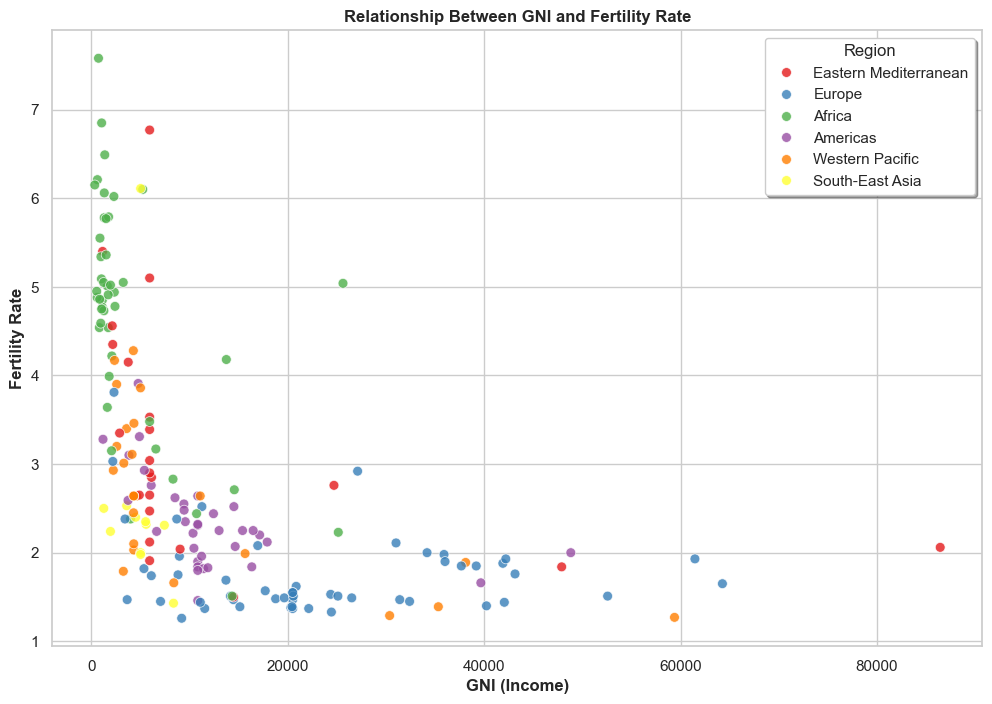

In [10]:
def create_custom_plot(
    df,
    x_col,
    y_col,
    hue_col,
    plot_type,
    title,
    xlabel,
    ylabel,
    legend_title,
    legend=True,
):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(12, 8))

    if plot_type == "scatter":
        scatter = sns.scatterplot(
            x=x_col,
            y=y_col,
            hue=hue_col,
            data=df,
            alpha=0.8,
            palette="Set1",
            s=50,
            legend=legend,
        )
        scatter.set_xlabel(xlabel, fontweight="bold")
        scatter.set_ylabel(ylabel, fontweight="bold")
        plt.title(title, fontweight="bold")
    elif plot_type == "boxplot":
        boxplot = sns.boxplot(x=x_col, y=y_col, hue=hue_col, data=df, palette="Set2")
        boxplot.set_xlabel(xlabel, fontweight="bold")
        boxplot.set_ylabel(ylabel, fontweight="bold")
        boxplot.set_title(title, fontweight="bold")
        scatter = None

    plt.grid(True)

    if legend and scatter:
        legend_title = legend_title if legend_title else None
        plt.legend(title=legend_title, fancybox=True, shadow=True)

    plt.show()


create_custom_plot(
    health_and_demographics_df,
    x_col="GNI",
    y_col="FertilityRate",
    hue_col="Region",
    plot_type="scatter",
    title="Relationship Between GNI and Fertility Rate",
    xlabel="GNI (Income)",
    ylabel="Fertility Rate",
    legend_title="Region",
)

The scatter plot reveals a significant trend in the relationship between Gross National Income (GNI) and fertility rates. The data shows that as GNI increases, fertility rates decrease, and vice versa. This trend is consistent across different regions of the world. Specifically, African  and South-East Asian countries tend to have lower GNI and higher fertility rates, while European nations have higher GNI and lower fertility rates. Therefore, there seems to be a correlation between economic prosperity and reduced birth rates.
<hr>

Table showing regional literacy rates in ascending order.

In [11]:
regional_literacy_table = create_sorted_table(
    health_and_demographics_df, "Region", "LiteracyRate"
)
regional_literacy_table

,Region,LiteracyRate
0,South-East Asia,65.52
1,Africa,69.42
2,Eastern Mediterranean,83.87
3,Western Pacific,92.91
4,Americas,93.19
5,Europe,98.99


The table provides a clear overview of the literacy rates across different global regions in ascending order, South-East Asia has the lowest Litercay Rate while Europe has the highest (%) Literacy Rate.
<hr>

Table of Regions in ascending order based on Child Mortality Rates.

In [12]:
regional_child_mortality_table = create_sorted_table(
    health_and_demographics_df, "Region", "ChildMortality"
)
regional_child_mortality_table

,Region,ChildMortality
0,Europe,10.05
1,Americas,19.32
2,Western Pacific,24.71
3,South-East Asia,35.05
4,Eastern Mediterranean,40.25
5,Africa,84.04


The table displays various child mortality rates across different regions of the world in ascending order. Europe has the lowest while Africa has the highest level of Child Mortality.
<hr>

Table of Life Expectancy Across Regions in ascending order. 

In [13]:
regional_life_expectancy_table = create_sorted_table(
    health_and_demographics_df, "Region", "LifeExpectancy", decimal_places=0
)

regional_life_expectancy_table["LifeExpectancy"] = regional_life_expectancy_table[
    "LifeExpectancy"
].astype(int)

regional_life_expectancy_table

,Region,LifeExpectancy
0,Africa,58
1,South-East Asia,69
2,Eastern Mediterranean,70
3,Western Pacific,72
4,Americas,74
5,Europe,77


The table offers a brief overview of the average life expectancies in different regions across the world sorted in ascending order.
<hr>

Displaying Life Expectancy Across Regions using Box-and-Whisker plots.

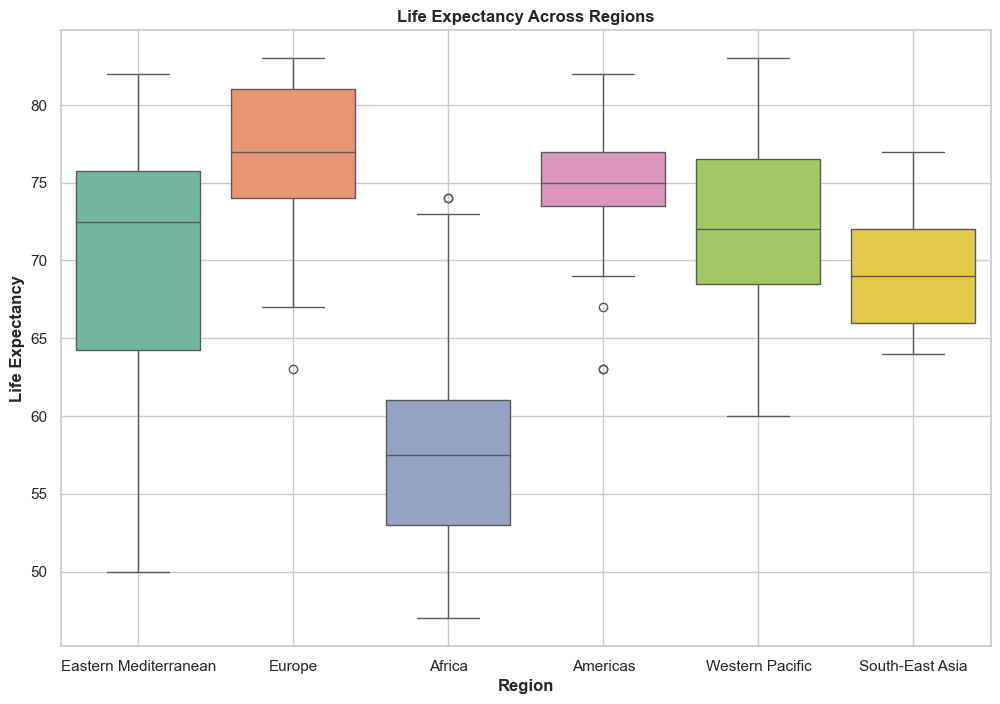

In [14]:
create_custom_plot(
    health_and_demographics_df,
    x_col="Region",
    y_col="LifeExpectancy",
    hue_col="Region",
    plot_type="boxplot",
    title="Life Expectancy Across Regions",
    xlabel="Region",
    ylabel="Life Expectancy",
    legend_title="Region",
    legend=False,
)

The box plot named "Life Expectancy Across Regions" shows Life expectancy differs a lot between regions. Africa generally has lower and more variable life expectancies, while Europe stands out with higher and more consistent values. The Americas and the Eastern Mediterranean fall in between. Some regions, like South-East Asia and the Western Pacific, show more stable trends.
<hr>

This is a scatter plot displaying the relationship between Life Expectancy and GNI Across Regions.

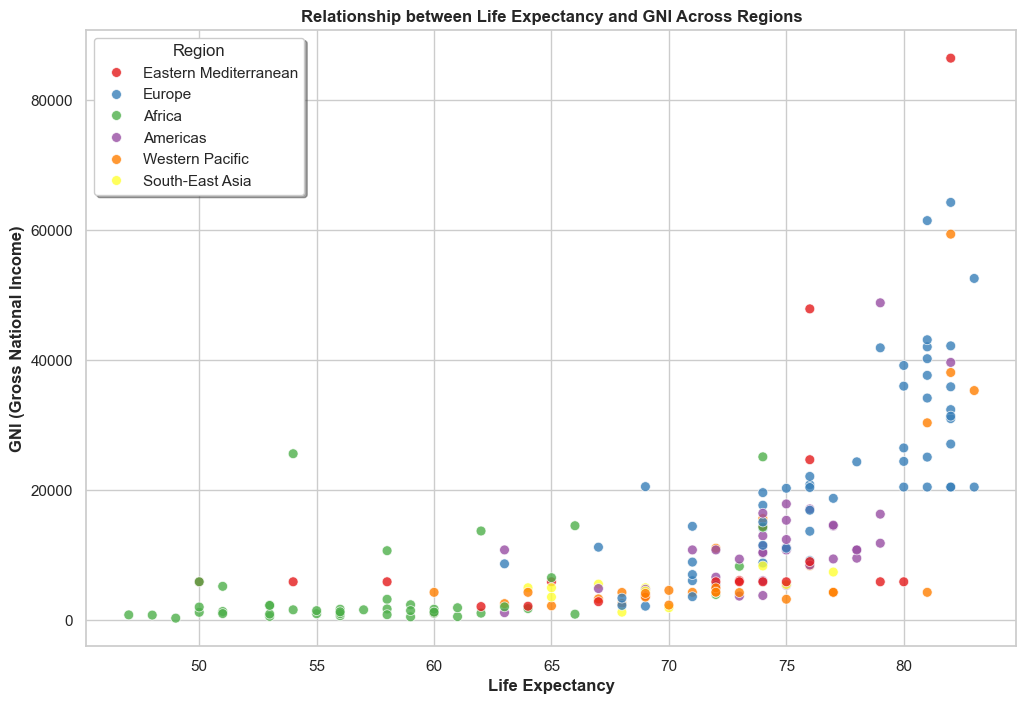

In [15]:
create_custom_plot(
    health_and_demographics_df,
    x_col="LifeExpectancy",
    y_col="GNI",
    hue_col="Region",
    plot_type="scatter",
    title="Relationship between Life Expectancy and GNI Across Regions",
    xlabel="Life Expectancy",
    ylabel="GNI (Gross National Income)",
    legend_title="Region",
    legend=True,
)

As I was analyzing the scatter plot titled "Life Expectancy and GNI Across Regions," I had a moment of personal reflection and the global trends took on a more human dimension. I noticed a negative correlation between Gross National Income (GNI) and fertility rates, which seemed to be a complex dance between economic well-being and family planning. When I saw African countries with lower GNI and higher fertility rates, I felt a sense of connection and thought about the resilience and resourcefulness of these communities that navigate challenges with larger families.

On the other hand, when I looked at European countries with higher GNI and lower fertility rates, I felt like I was glimpsing into a different life narrative. This contrast highlighted the nuanced interplay between economic prosperity and family choices. This visual narrative prompted personal reflection on the varied experiences of individuals and families globally, where economic circumstances shape not only financial well-being but also impact decisions about family size. It reminded me that behind every data point, there are real stories of people making choices influenced by the economic landscapes in which they live.
<hr>

This is a scatter plot displaying the relationship between Fertility rate and GNI Across Regions.

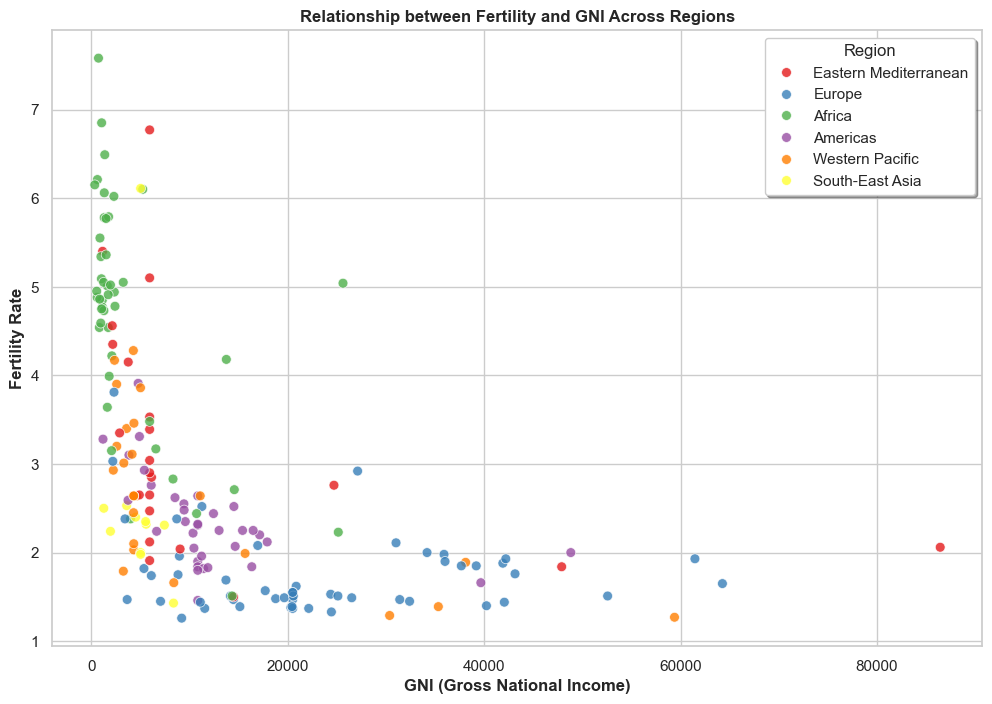

In [16]:
create_custom_plot(
    health_and_demographics_df,
    x_col="GNI",
    y_col="FertilityRate",
    hue_col="Region",
    plot_type="scatter",
    title="Relationship between Fertility and GNI Across Regions",
    xlabel="GNI (Gross National Income)",
    ylabel="Fertility Rate",
    legend_title="Region",
    legend=True,
)

Upon examining the scatter plot titled "Relationship between Fertility and GNI Across Regions," I observed a clear trend that countries with higher Gross National Income (GNI) tend to have lower fertility rates. This trend is consistent globally, with African countries having lower income and higher fertility rates, while European countries, with higher income, generally have fewer children. 

As I took in the visual information, it felt like I was peering into the lived experiences of diverse regions. In Africa, where income is lower, families often have more children, while in Europe, where there's higher income, families typically have fewer children. This prompted me to reflect on the intricate connection between income and family decisions worldwide. It's more than just numbers on a graph; it's about the genuine stories and choices that influence the lives of people in different corners of the world.

Overall, this visualization highlights the importance of considering the social and economic factors that affect family planning decisions. It's important to understand the cultural and economic contexts in which families make decisions about their family size, as this can have significant implications for individuals, communities, and societies as a whole.
<hr>

This is a scatter plot for Literacy and Life Expectancy for each region globally.

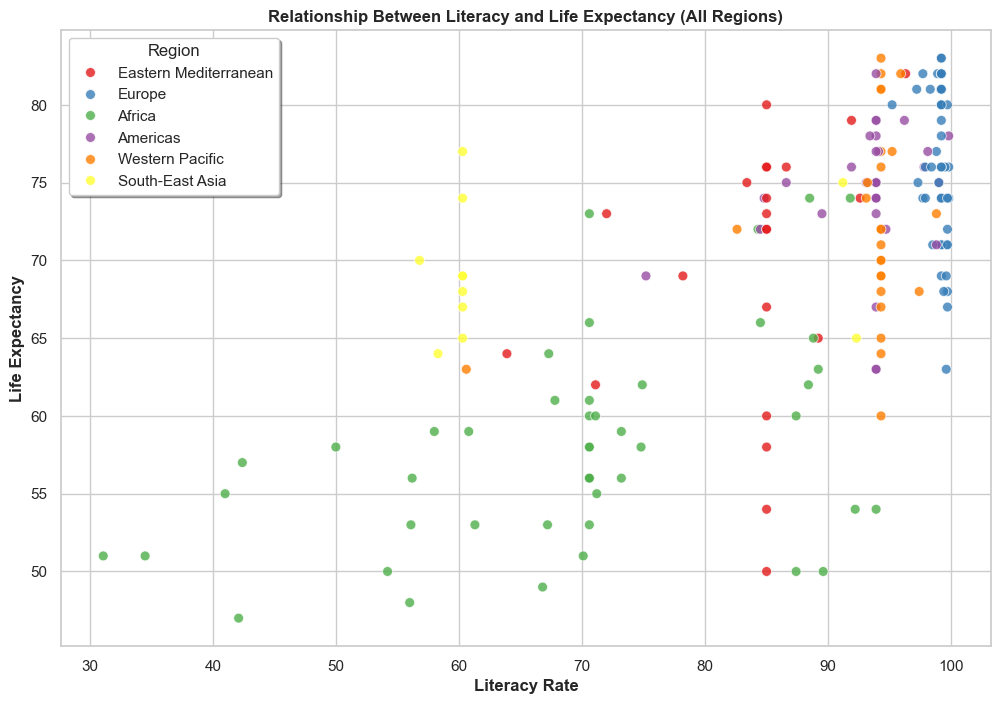

In [17]:
create_custom_plot(
    health_and_demographics_df,
    x_col="LiteracyRate",
    y_col="LifeExpectancy",
    hue_col="Region",
    plot_type="scatter",
    title="Relationship Between Literacy and Life Expectancy (All Regions)",
    xlabel="Literacy Rate",
    ylabel="Life Expectancy",
    legend_title="Region",
    legend=True,
)

After examining a scatter plot that showed the link between literacy rates and life expectancy worldwide, I found myself reflecting on the topic. I was struck by how higher literacy rates correlated with longer life expectancies, particularly in Europe where both were commendably high. It was a powerful example of how education could help people live healthier, longer lives.

However, I was also deeply moved by the contrasting scene in Africa, where lower literacy rates coincided with shorter life expectancies. This stirred up a sense of empathy and urgency in me. It wasn't just about the numbers on a graph; it was a call to action to advocate for improved education and healthcare access. The graph became a personal mission to address the regional disparities that affect real people's lives. It reminded me that beyond the data, there are individuals and communities who need better opportunities, education, and healthcare to improve their chances of a longer, healthier life.
<hr>

This is a scatter plot for Literacy and Life Expectancy in countries within the African region.

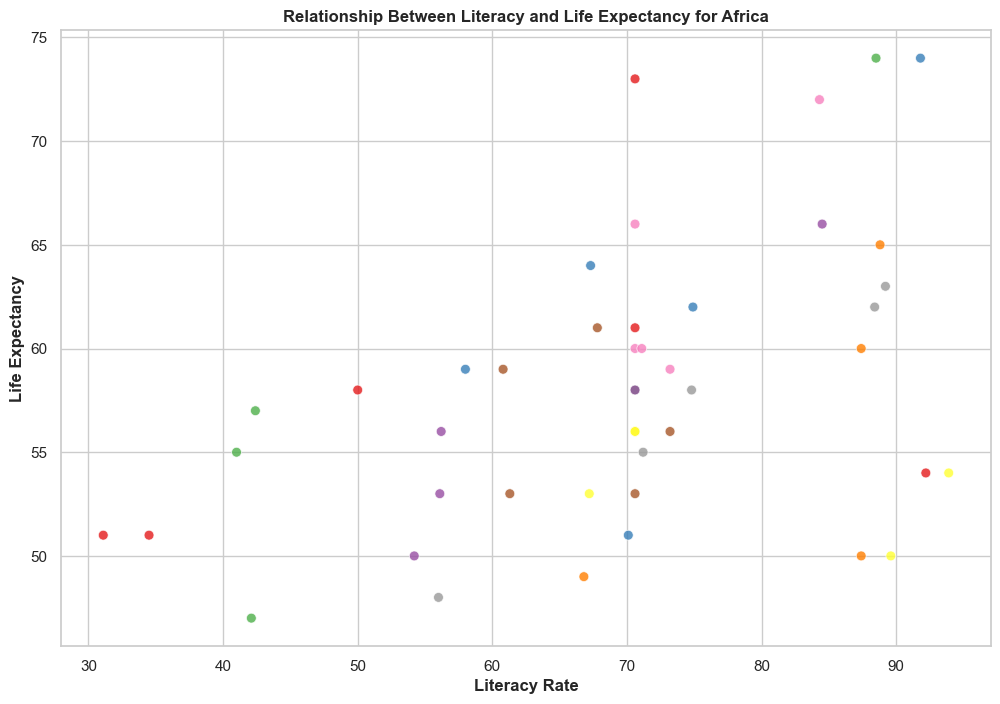

In [18]:
african_countries_df = health_and_demographics_df[
    health_and_demographics_df["Region"] == "Africa"
]

create_custom_plot(
    african_countries_df,
    x_col="LiteracyRate",
    y_col="LifeExpectancy",
    hue_col="Country",
    plot_type="scatter",
    title="Relationship Between Literacy and Life Expectancy for Africa",
    xlabel="Literacy Rate",
    ylabel="Life Expectancy",
    legend_title="Country",
    legend=False,
)

As I analyzed the scatter plot titled "Literacy and Life Expectancy in Africa," I noticed a strong correlation between literacy rates and life expectancy. This connection resonated with me personally and made me realize the profound impact education can have on people's lives in African countries.

Each data point on the plot represented a country and highlighted the progress made in terms of education and overall health. The rise in life expectancy with increasing literacy rates was a promising trend that could lead to improved well-being and resilience. It made me reflect on how education empowers individuals to make informed health choices, adopt healthier lifestyles, and engage effectively with healthcare services.

This insight reinforced my belief that investing in literacy programs is an essential step towards creating positive change. It is crucial to recognize that by focusing on education, we can directly impact the lives of individuals and communities, and pave the way for a healthier and more sustainable future across the diverse landscapes of Africa.

# Conclusions.

The exploration of diverse data sets and extensive discussions has resulted in a comprehensive narrative that goes beyond statistical insights, delving into the intricate dynamics of global well-being. Through a detailed analysis of the intersection of various factors, a common thread linking literacy rates, life expectancy, fertility, and Gross National Income (GNI) has been unraveled, revealing a tale of interconnectedness and highlighting the profound impact of education, economic prosperity, and healthcare access on the lives of individuals across diverse regions.

Starting with the intersection of literacy and life expectancy, the positive correlation observed worldwide is a testament to the transformative power of education. The acquisition of reading skills is just one of the many benefits of literacy; it emerges as a catalyst for informed decision-making, healthier lifestyles, and more effective engagement with healthcare services. The juxtaposition of regions with high literacy rates and extended life expectancies, such as Europe, and those with lower literacy rates such as South-East Asia and shorter life expectancies in regions such as Africa underscores the urgent need for targeted education and healthcare interventions. This is because education empowers individuals to make informed decisions about their health and well-being, leading to better outcomes.

Moving on to the relationship between fertility rates and GNI, the global trend portrays a nuanced dance between economic prosperity and family planning decisions. The inverse relationship, where higher GNI corresponds with lower fertility rates, highlights the influence of financial well-being on family choices. The disparities between African or South-East Asian countries, characterized by lower GNI and higher fertility rates and European nations with higher GNI and lower fertility rates, offer glimpses into the diverse narratives of communities navigating economic circumstances and shaping family dynamics accordingly. This relationship is complex and multi-faceted, influenced by cultural norms, access to healthcare, and education, among other factors.

Zooming out to view the comprehensive picture, it becomes evident that these factors are not isolated variables but interconnected components of a complex system influencing public health outcomes. The urgent call for better education and healthcare in regions with lower literacy rates and shorter life expectancies, particularly in Africa, resonates as a shared responsibility for global well-being. Similarly, recognizing the impact of economic prosperity on family planning decisions emphasizes the need for inclusive policies that address regional disparities. This requires a holistic approach that takes into account the interplay of various factors, including culture, education, healthcare, and economics, among others.

In essence, the conclusion drawn from this multifaceted exploration is a call to action. It beckons policymakers, educators, and global citizens to recognize the power of education in shaping healthier lives, the role of economic well-being in influencing family choices, and the imperative of targeted interventions to bridge regional health disparities. Beyond the numbers and graphs, this narrative underscores the shared humanity that binds us together, urging collective efforts to create a world where health and well-being are universally attainable, irrespective of geographical location or economic status. With a comprehensive understanding of the interplay between various factors influencing public health outcomes, we can work together to create a healthier, more equitable world for all.